In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
complete_path = os.getcwd()
if 'nb' in complete_path:
    os.chdir("..")

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import os
import pandas as pd
import yaml
from IPython.display import clear_output

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from mlnrg.utils.mpl_at_utils import MPLAdjutant

In [5]:
dirPath = "/Users/erica/Documents/Research/2channel_anderson/first_trials/"
origData = np.loadtxt((dirPath+"same_channels_sym/Initial_trials_SF.csv"),
#origData = np.loadtxt((dirPath+"diff_channels/version3/Initial_trials_SF.csv"),
                  delimiter=",",
                  dtype=float
                  ) 
origData=origData[:,:-1]

In [6]:
omegas=np.loadtxt("/Users/erica/Documents/Research/2channel_anderson/first_trials/All_omegas.csv",
                 delimiter=",",
                 dtype=float
                 )
colNames = np.array(['ID', '$U$', '$\Gamma$', '$\epsilon_d$', '$B$', '$T$', '$U_{12}$', '$J_{12}$', 'a2', '$T_K$'])

In [8]:
allData = origData

# These are the desired 'baselines' so U12=J12=0 for these two trials. 
U1 = 0.1; G1 = 0.01; e1 = -0.05; 
U2 = 0.1; G2 = 0.01; e2 = -0.05;

U12=0.0;
J12=0.0;

# 0 ID   1 U   2 G   3 epsd   4 B   5 T   6 U12   7 J12   8 a2   9 TK
targetCol = 7; # The variable in question.

baselineID1 = np.where(
    (allData[:,1]==U1) & # U
    (allData[:,2]==G1) & # Gamma
    (allData[:,3]==e1) & # epsd
    (allData[:,6]==U12) & #U12
    (allData[:,7]==J12) & #J12
    (allData[:,8] == -1)
)[0]
indepTrial1 = allData[baselineID1, :]
allData=np.delete(allData, baselineID1, axis=0)

if ((U1!=U2) | (G1!=G2) | (e1!=e2)):
    baselineID2 = np.where(
        (allData[:,1]==U2) & # U
        (allData[:,2]==G2) & # Gamma
        (allData[:,3]==e2) & # epsd
        (allData[:,6]==U12) & #U12
        (allData[:,7]==J12) & #J12
        (allData[:,8] == -1)
    )[0]
    indepTrial2 = allData[baselineID2, :]
    allData=np.delete(allData, baselineID2, axis=0)


data = allData[np.argsort(allData[:,targetCol])]
print("Featuring changes in %s" % colNames[targetCol])
features=data[:,:10]

Featuring changes in $J_{12}$


In [18]:
if targetCol==6:
    match1 = np.where(
        (data[:,1]==U1) & # U
        (data[:,2]==G1) & # Gamma
        (data[:,3]==e1) & # epsd
        (data[:,6]!=0.0) & #U12
        (data[:,7]==0.0) & #J12
        (data[:,8] == -1)
    )[0]

    if ((U1!=U2) | (G1!=G2) | (e1!=e2)):
        match2 = np.where(
            (data[:,1]==U2) & # U
            (data[:,2]==G2) & # Gamma
            (data[:,3]==e2) & # epsd
            (data[:,6]!=0.0) & #U12
            (data[:,7]==0.0) & #J12
            (data[:,8] == -1)
        )[0]
        print(match2)
        print(data[match2, targetCol])
        
elif targetCol==7:
    match1 = np.where(
        (data[:,1]==U1) & # U
        (data[:,2]==G1) & # Gamma
        (data[:,3]==e1) & # epsd
        (data[:,6]==0.0) & #U12
        (data[:,7]!=0.0) & #J12
        (data[:,8] == -1)
    )[0]


    if ((U1!=U2) | (G1!=G2) | (e1!=e2)):
        match2 = np.where(
            (data[:,1]==U2) & # U
            (data[:,2]==G2) & # Gamma
            (data[:,3]==e2) & # epsd
            (data[:,6]==0.0) & #U12
            (data[:,7]!=0.0) & #J12
            (data[:,8] == -1)
        )[0]
        print(match2)
        print(data[match2, targetCol])
        
print ("Featuring changes in %s. There are %d matches + 1 baseline." % (colNames[targetCol], len(match1)))          
for i in range(0, len(match1)):
    print("Element %d: %s=%0.5f" % (i, colNames[targetCol], data[match1[i], targetCol]))

Featuring changes in $J_{12}$. There are 18 matches + 1 baseline.
Element 0: $J_{12}$=-0.01000
Element 1: $J_{12}$=-0.00500
Element 2: $J_{12}$=-0.00400
Element 3: $J_{12}$=-0.00300
Element 4: $J_{12}$=-0.00250
Element 5: $J_{12}$=-0.00200
Element 6: $J_{12}$=-0.00150
Element 7: $J_{12}$=-0.00100
Element 8: $J_{12}$=0.00010
Element 9: $J_{12}$=0.00050
Element 10: $J_{12}$=0.00100
Element 11: $J_{12}$=0.00150
Element 12: $J_{12}$=0.00200
Element 13: $J_{12}$=0.00300
Element 14: $J_{12}$=0.00400
Element 15: $J_{12}$=0.00450
Element 16: $J_{12}$=0.00500
Element 17: $J_{12}$=0.01000


<Figure size 1800x1200 with 0 Axes>

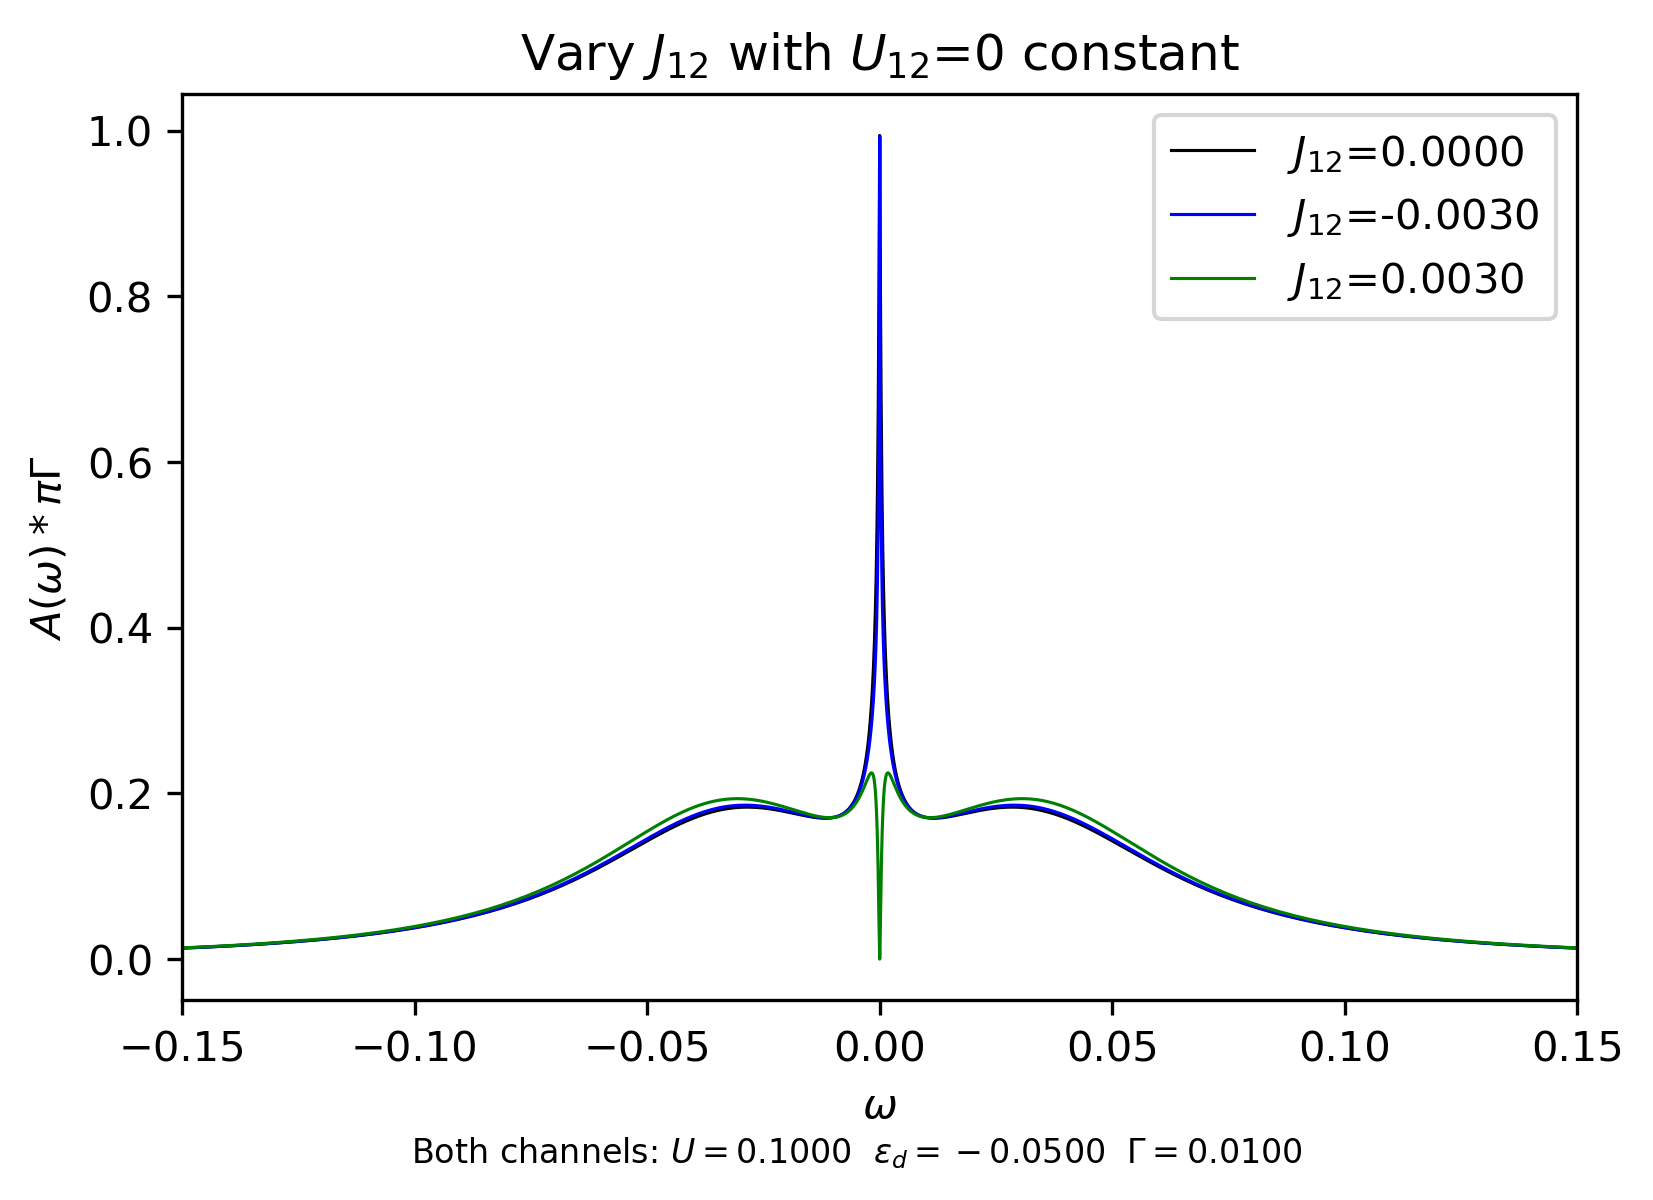

In [12]:
plt.clf()
fig, ax = plt.subplots()

if targetCol == 6:
    ax.set_title('Vary $U_{12}$ with $J_{12}$=0 constant')
elif targetCol ==7:
    ax.set_title('Vary $J_{12}$ with $U_{12}$=0 constant')
ax.set_xlabel('$\omega$')
ax.set_ylabel('$A(\omega)*\pi\Gamma$')
ax.set_xlim([-0.15, 0.15])
#ax.set_ylim([-0.001, 0.35])

colors=np.array([['black', 'gray'],
        ['blue', 'cornflowerblue'],
        ['green', 'limegreen'],
        ['red', 'palevioletred'],
        ['darkviolet', 'mediumorchid'],
        ['darkgoldenrod', 'gold'],
        ['saddlebrown', 'peru'],
        ['teal', 'mediumturquoise'],
        ['darkblue', 'royalblue']
        ]
        )
c=1; d=1;

ax.plot(omegas, indepTrial1[0,10:], label='%s=%.4f' % (colNames[targetCol], indepTrial1[0,targetCol]), 
        linewidth=0.75, color=colors[0,0])
for i in match1[[3,13]]:
    ax.plot(omegas, data[i,10:], label='%s=%.4f' % (colNames[targetCol], data[i,targetCol]), linewidth=0.75, color=colors[c,0])
    c = c+1
    
if ((U1==U2) & (G1==G2) & (e1==e2)):
    fig.text(0.5, -0.01, r'Both channels: $U=%.4f$  $\epsilon_d=%.4f$  $\Gamma=%.4f$' 
             % (U1, e1, G1), ha='center', fontsize=8)
    
else:
    fig.text(0.5, -0.01, r'Dark/solid: $U=%.4f$  $\epsilon_d=%.4f$  $\Gamma=%.4f$'
             % (U1, e1, G1), ha='center', fontsize=8)
    fig.text(0.5, -0.05, r'Light/dashed: $U=%.4f$  $\epsilon_d=%.4f$  $\Gamma=%.4f$'
             % (U2, e2, G2) , ha='center', fontsize=8)
    ax.plot(omegas, indepTrial2[0,10:], linewidth=0.75, color=colors[0,1], linestyle='--')
    for j in match2[[5,6,7,8,9]]:
        ax.plot(omegas, data[j,10:], linewidth=0.75, color=colors[d,1], linestyle='--')
        d = d+1
    
ax.legend()
    